# Multi-Linear Regression (MLR)

> MLR using libraries - December 2024
>
> NEC First Assignment - Universitat Rovira i Virgili
>
> *Andrea Pujals Bocero*

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#read and parse the .csv features file for A1-synthetic
df = pd.read_csv('A1-synthetic.csv', decimal=".")
df.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.968392,11.005370,0.511468,2.417192,100.108795,2.726705,78.148504,0.313000,13.868300,6.367773
std,28.418028,0.584090,0.283292,1.147284,4.893623,0.275193,5.016537,0.463946,3.253272,3.841009
min,-49.942910,10.000103,0.000147,1.002395,85.147019,1.974029,62.554174,0.000000,10.100000,-0.791114
25%,-23.938244,10.510135,0.267591,1.258367,96.934414,2.540117,74.814175,0.000000,10.861926,3.124304
50%,2.852507,10.990934,0.515436,3.042135,99.920497,2.710712,78.101481,0.000000,13.089869,5.665139
75%,25.494062,11.517569,0.757415,3.498211,103.482385,2.902578,81.604561,1.000000,16.366096,9.260205
max,49.889593,11.999189,0.999727,3.999776,116.239538,3.600914,94.502170,1.000000,22.033951,16.080230


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.509967,0.502863,0.511535,0.472011,0.481202,0.462648,0.488116,0.313000,0.315763,0.424322
std,0.284657,0.292178,0.283411,0.382762,0.157389,0.169153,0.157022,0.463946,0.272606,0.227665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260483,0.255133,0.267556,0.085399,0.379107,0.347958,0.383749,0.000000,0.063845,0.232075
50%,0.528840,0.495642,0.515506,0.680507,0.475146,0.452818,0.486644,0.000000,0.250535,0.382676
75%,0.755635,0.759080,0.757586,0.832666,0.589703,0.570753,0.596294,1.000000,0.525065,0.595763
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.model_selection import train_test_split

#separate the data into features and target

#x, y = df.drop(["z"], axis=1), df2[["z"]]
x, y = df_scaled.drop(["z"], axis=1), df_scaled[["z"]]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
#print the training and testing sets shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(800, 9) (800, 1)
(200, 9) (200, 1)


In [17]:
# Create a model that is a Linear Regression
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()

# fit the model with the data
mlr_model.fit(x_train, y_train)

#print the parameters of the model
print(f"Model parameters:\nCoefficients: {mlr_model.coef_}\nIntercept: {mlr_model.intercept_}")

Model parameters:
Coefficients: [[-0.00115185  0.15735006  0.00519687  0.08512535 -0.30244753 -0.01580084
   0.31025884  0.06016561  0.70033303]]
Intercept: [0.065535]


In [18]:
#Evaluation of the model with the training data

#print the score of the model (the R^2 value)
print("Model score: ", mlr_model.score(x_train, y_train))

y_pred = mlr_model.predict(x_train)

# THESE VALUES ARE DEPENDENT ON USING SCALED DATA OR NOT

#print the mean squared error of the model
from sklearn.metrics import mean_squared_error
print("Mean squared error (MSE): ", mean_squared_error(y_train, y_pred))

#print the mean absolute error of the model
from sklearn.metrics import mean_absolute_error
print("Mean absolute error (MAE): ", mean_absolute_error(y_train, y_pred))

#print the mean absolute percentage error of the model
from sklearn.metrics import mean_absolute_percentage_error
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_train, y_pred))

Model score:  0.9743718217072975
Mean squared error (MSE):  0.0013024423486367354
Mean absolute error (MAE):  0.028471778829102314
Mean absolute percentage error (MAPE):  475712499160.23553


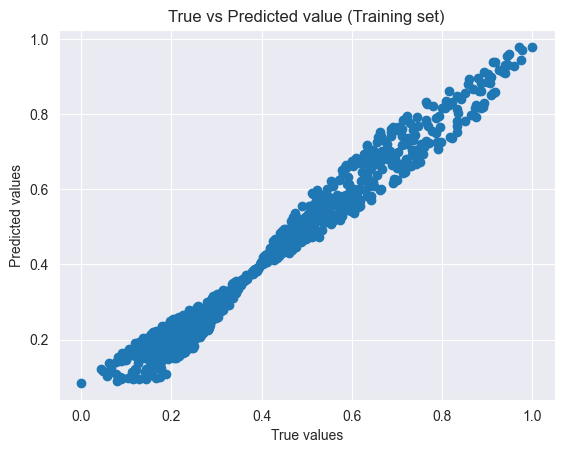

In [8]:
#plot the model predictions and the data

plt.scatter(y_train, mlr_model.predict(x_train))
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted value (Training set)")
plt.show()

In [9]:
#Evaluation of the model with the test data
 
 #print the score of the model (the R^2 value)
print("Model score: ", mlr_model.score(x_test, y_test))

y_pred = mlr_model.predict(x_test)

# THESE VALUES ARE DEPENDENT ON USING SCALED DATA OR NOT

#print the mean squared error of the model
from sklearn.metrics import mean_squared_error
print("Mean squared error (MSE): ", mean_squared_error(y_test, y_pred))

#print the mean absolute error of the model
from sklearn.metrics import mean_absolute_error
print("Mean absolute error (MAE): ", mean_absolute_error(y_test, y_pred))

#print the mean absolute percentage error of the model
from sklearn.metrics import mean_absolute_percentage_error
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_test, y_pred))

Model score:  0.973637408754218
Mean squared error (MSE):  0.0014476119354056476
Mean absolute error (MAE):  0.03111243623628522
Mean absolute percentage error (MAPE):  0.10188170393169439


Model score:  0.973637408754218


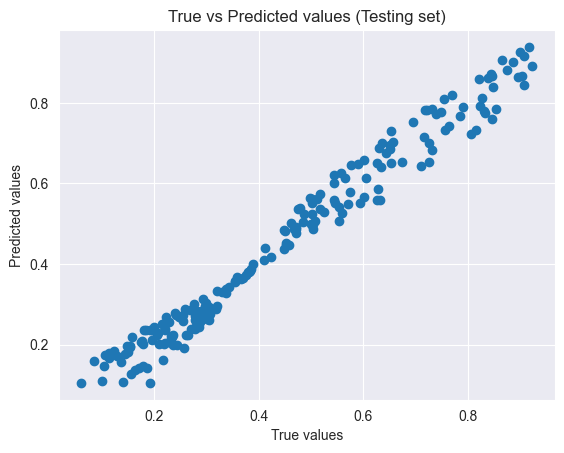

In [10]:
#Repeat the same steps for the testing set

print("Model score: ", mlr_model.score(x_test, y_test))

plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted values (Testing set)")
plt.show()